Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE`, as well as your email used on [Moodle](https://moodle.psl.eu/course/view.php?id=13990) below:

In [1]:
NAME = ""

---

# Homework 1: MLP from scratch

In this homework, you will code a [multilayer perceptron](https://en.wikipedia.org/wiki/Multilayer_perceptron) with one hidden layer to classify a cloud of points in 2D.

Advice:

- As much as possible, please try to make matrix and vector operations (good practice for efficient code)
- If you're not familiar with numpy, check the documentation of `np.max`, `np.clip`, `np.random.randn`, `np.reshape`. FYI the matrix multiplication operator is `@`, and you may want to learn about [broadcasting rules](https://numpy.org/doc/stable/user/basics.broadcasting.html) to see how it deals with tensor operations of different sizes.
- You can also check about `torch.clamp`, `torch.nn.Parameter`

## 1. Some utilities and your dataset

You should not modify the code in this section.

In [ ]:
!pip install numpy tqdm matplotlib scikit-learn torch

In [3]:
# all of these libraries are used for plotting
import numpy as np
import matplotlib.pyplot as plt


def plot_data(ax, X, y):
    '''
    Plot the dataset
    '''
    plt.axis("off")
    ax.scatter(X[:, 0], X[:, 1], s=1, c=y, cmap="bone")

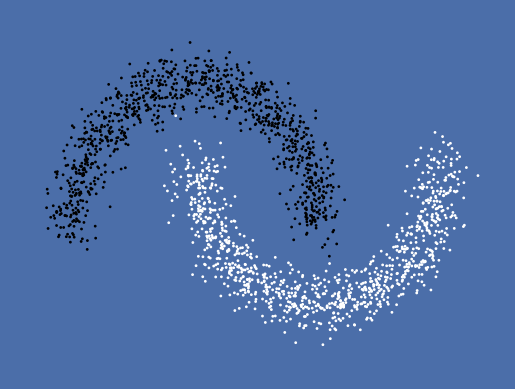

In [4]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X, y = make_moons(n_samples=2000, noise=0.1)
i_train, i_test = train_test_split(range(2000), test_size=0.2, shuffle=True)

%matplotlib inline
x_min, x_max = -1.5, 2.5
y_min, y_max = -1, 1.5
fig, ax = plt.subplots(1, 1, facecolor="#4B6EA9")
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)
plot_data(ax, X, y)
plt.show()

This is your dataset: two moons each one corresponding to one class (black or white in the picture above).

In order to make it more fun and illustrative, the code below allows you to see the decision boundary of your classifier. Unfortunately, animation is not working on Colab.

In [5]:
# Define the grid on which we will evaluate our classifier
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

to_forward = np.stack((xx, yy)).reshape(2, -1).T

def plot_decision_boundary(ax, X, y, classifier, to_forward):
    '''
    Plot the decision boundary of our classifier together with the data.
    '''
    # forward pass on the grid, then convert to numpy for plotting
    Z = classifier.forward(to_forward).reshape(xx.shape)

    # plot contour lines of the values of our classifier on the grid
    ax.contourf(xx, yy, Z > 0.5, cmap="Blues")

    # then plot the dataset
    plot_data(ax, X, y)

## 2. MLP in NumPy

Here you need to code your implementation of the [ReLU](https://en.wikipedia.org/wiki/Rectifier_(neural_networks) activation and the [Sigmoid](https://en.wikipedia.org/wiki/Sigmoid_function).

In [6]:
import numpy.typing as npt  # Yes, types exist in Python
# This one should work for NumPy version >= 1.20


class MyReLU:
    def forward(self, x: npt.NDArray[np.float64]) -> npt.NDArray[np.float64]:  # Type hinting
        """
        Input: a NumPy array
        Output: a NumPy array
        The ReLU is y_i = max(0, x_i)
        """
        # YOUR CODE HERE
        raise NotImplementedError

    def backward(self, grad_output: npt.NDArray[np.float64]) -> npt.NDArray[np.float64]:
        """
        Input: a NumPy array
        Output: a NumPy array
        The gradient is 1 for the inputs that were above 0, 0 elsewhere
        """
        # YOUR CODE HERE
        raise NotImplementedError

    def step(self, learning_rate):
        pass  # no need to do anything here, since ReLU has no parameters


class MySigmoid:
    def forward(self, x):
        # the sigmoid is y_i = 1./(1+exp(-x_i))
        # YOUR CODE HERE
        raise NotImplementedError

    def backward(self, grad_output):
        # the partial derivative is e^(-x) / (e^(-x) + 1)^2
        # YOUR CODE HERE
        raise NotImplementedError

    def step(self, learning_rate):
        pass  # no need to do anything here since Sigmoid has no parameters

Probably a good time to test your functions...

In [7]:
X[10]

array([0.56688936, 0.76369259])

In [ ]:
test_relu = MyReLU()
test_relu.forward(X[10])

In [ ]:
test_relu.backward(np.array(1.0))

In [ ]:
test_sig = MySigmoid()

test_sig.forward(np.ones(1))

In [ ]:
test_sig.backward(np.ones(1))

A bit more complicated, you need now to implement your linear layer i.e. multiplication by a matrix $W$ and summing with a bias $b$.

In [ ]:
class MyLinear:
    def __init__(self, n_input, n_output):
        """
        Initialize two random matrices for W and b (use np.random.randn)
        """
        # YOUR CODE HERE
        raise NotImplementedError

    def forward(self, x):
        """
        Input: a batch of size B x D where D = n_input = 2 is the input dimension.
        Output: a batch of size B x n_output where n_output is the output dimension.
        For one sample (row vector) x, it should return the row vector (W x.T + b).T. And for several samples?
        Save a copy of x, you'll need it for the backward
        """
        # YOUR CODE HERE
        raise NotImplementedError

    def backward(self, grad_output):
        """
        Update self.grad_W and self.grad_b
        """
        # y_i = \sum_j W_{i,j} x_j + b_i
        # d y_i / d W_{i, j} = x_j
        # d loss / d y_i = grad_output[i]
        # so d loss / d W_{i,j} = x_j * grad_output[i] (by the chain rule)
        # YOUR CODE HERE
        
        # d y_i / d b_i = 1
        # d loss / d y_i = grad_output[i]
        # d loss / d b = ?
        # YOUR CODE HERE
        
        # now we need to compute the gradient with respect to x to continue the back propagation
        # d y_i / d x_j = W_{i, j}
        # to compute the gradient of the loss, we have to sum over all possible y_i in the chain rule
        # d loss / d x_j = \sum_i (d loss / d y_i) (d y_i / d x_j)
        # YOUR CODE HERE
        raise NotImplementedError

    def step(self, learning_rate):
        """
        Update self.W and self.b in the opposite direction of the stored gradients, using learning_rate
        """
        # YOUR CODE HERE
        raise NotImplementedError

As we did in practicals, you need now to code your network (what we called my_composition in the [practicals](https://github.com/dataflowr/notebooks/blob/master/Module2/02_backprop.ipynb)). Recall that with a Sigmoid layer, you should use the BCE loss.

In [ ]:
class Sequential:
    def __init__(self, layers):
        # YOUR CODE HERE
        raise NotImplementedError

    def forward(self, x):
        # YOUR CODE HERE
        raise NotImplementedError

    def compute_loss(self, out, label):
        """
        Use the BCE loss:
            -\sum (label * log(output) + (1 - label) * log(1 - output))
        Save the gradient, and return the loss
        Beware of dividing by zero in the gradient; if needed, add a small value (1e-10) to the denominator
        """
        out = out.reshape(-1)  # Remove the output dimension so that it has same size as label
        # YOUR CODE HERE
        raise NotImplementedError

    def backward(self):
        """
        Apply backprop sequentially, starting from the gradient of the loss
        """
        # YOUR CODE HERE
        raise NotImplementedError

    def step(self, learning_rate):
        """
        Take a gradient step for each layer
        """
        # YOUR CODE HERE
        raise NotImplementedError

In [ ]:
# Unfortunately interactive animation (%matplotlib notebook) is not working on Colab
# Please try using your computer instead
from tqdm.notebook import tqdm  # Just a nice progress bar
import logging


def train_and_evaluate(model, n_epochs=10000):
    """
    A function that takes a model and performs training and plotting.
    """
    %matplotlib notebook
    fig, ax = plt.subplots(1, 1, facecolor="#4B6EA9")
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    losses = []
    test_acc = []
    learning_rate = 1e-2
    for it in tqdm(range(n_epochs)):
        # Shuffle the training set for SGD
        np.random.shuffle(i_train)

        # Select the corresponding example and label
        sample = X[i_train][it % len(i_train)].reshape(1, -1)
        label = y[i_train][it % len(i_train)]

        # do a forward pass on the example
        # YOUR CODE HERE

        # compute the loss according to your output and the label
        # YOUR CODE HERE
        losses.append(loss)

        # backward pass
        # YOUR CODE HERE

        # gradient step
        # YOUR CODE HERE

        if it % 250 == 0:  # Every 250 samples seen
            # Compute test predictions and mean accuracy on test set
            test_pred = np.round(model.forward(X[i_test])).reshape(-1)
            test_acc.append((test_pred == y[i_test]).mean())
            logging.warning("test acc=%f", test_acc[-1])  # This is useful if you want to log to a file for example

            plot_decision_boundary(ax, X, y, model, to_forward)
            fig.canvas.draw()

    plot_decision_boundary(ax, X, y, model, to_forward)
    fig.canvas.draw()

    return losses, test_acc

In [ ]:
# Define your network with Sequential
# Let us start with mere logistic regression:
# Just a linear layer with 2 inputs and 1 input followed by a sigmoid

# YOUR CODE HERE
model = None

In [ ]:
# Test the forward function; are all shapes correct?

model.forward(X[0].reshape(1, -1))

model.forward(X)

In [ ]:
losses, test_acc = train_and_evaluate(model)

In [ ]:
%matplotlib inline
plt.plot(losses)
plt.show()

In [ ]:
plt.plot(test_acc)
plt.show()

In [ ]:
h = 50

# Let us now define a deeper network with Sequential:
# It should be a linear layer with 2 inputs and h outputs, followed by a ReLU
# then a linear layer with h inputs and 1 output, followed by a sigmoid
# Feel free to try other architectures

# YOUR CODE HERE
model = None

mlp_losses, mlp_test_acc = train_and_evaluate(model)

In [ ]:
%matplotlib inline
plt.plot(mlp_losses)

In [ ]:
plt.plot(test_acc, label='Logistic regression')
plt.plot(mlp_test_acc, label='Multilayer perceptron')
plt.legend()

## 3. Using a PyTorch module

In this last part, use `torch.nn.Module` to recode `MyLinear` and `MyReLU` so that these modules will be PyTorch-compatible.

In [ ]:
import torch
import torch.nn as nn


class MyLinearModule(nn.Module):
    def __init__(self, n_input, n_output):
        '''
        Define self.W and self.b the weights and biases
        Initialize them with a normal distribution using nn.Parameter and torch.randn
        '''
        super().__init__()
        # YOUR CODE HERE
        raise NotImplementedError

    def forward(self, x):
        # YOUR CODE HERE
        raise NotImplementedError


class MyReLUModule(nn.Module):
    def __init__(self):
        super().__init__()

    def forward(self, x):
        # YOUR CODE HERE
        raise NotImplementedError

In [ ]:
# the grid for plotting the decision boundary should be now made of tensors.
to_forward_torch = torch.Tensor(to_forward)

Define your network using `MyLinearModule`, `MyReLUModule` and [`nn.Sigmoid`](https://pytorch.org/docs/stable/nn.html#sigmoid)

In [ ]:
h = 50

# Define your network with nn.Sequential (does not take a list but directly layers as arguments)
# Use MyLinearModule, MyReLUModule and nn.Sigmoid (from PyTorch)

# YOUR CODE HERE
model_torch = None

In [ ]:
from torch import optim

optimizer = optim.SGD(model_torch.parameters(), lr=1e-2)

X_train_torch = torch.Tensor(X[i_train])
y_train_torch = torch.Tensor(y[i_train])
X_test_torch = torch.Tensor(X[i_test])

%matplotlib notebook
fig, ax = plt.subplots(1, 1, facecolor="#4B6EA9")
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)

losses_torch = []
mlp_test_acc_torch = []
criterion = nn.BCELoss()
random_indices = np.arange(len(X_train_torch))
for it in tqdm(range(10000)):
    # Shuffle samples for SGD
    np.random.shuffle(random_indices)

    # select the corresponding example and label
    sample = X_train_torch[random_indices][it % len(random_indices)].reshape(1, -1)
    label = y_train_torch[random_indices][it % len(random_indices)].reshape(1, -1)

    # do a forward pass on the example
    # YOUR CODE HERE

    # compute the loss according to your output and the label
    # YOUR CODE HERE

    # zero the gradients
    # YOUR CODE HERE

    # backward pass
    # YOUR CODE HERE
    losses_torch.append(loss.detach().numpy())

    # gradient step
    # YOUR CODE HERE

    # draw the current decision boundary every 250 examples seen
    if it % 250 == 0:
        test_pred = np.round(model_torch(X_test_torch).detach().numpy()).reshape(-1)
        mlp_test_acc_torch.append((test_pred == y[i_test]).mean())
        logging.warning("test acc=%f", mlp_test_acc_torch[-1])

        plot_decision_boundary(ax, X, y, model_torch, to_forward_torch)
        fig.canvas.draw()

plot_decision_boundary(ax, X, y, model_torch, to_forward_torch)
fig.canvas.draw()

In [ ]:
%matplotlib inline
plt.plot(losses_torch)

In [ ]:
plt.plot(test_acc, label='Logistic regression')
plt.plot(mlp_test_acc, label='Multilayer perceptron')
plt.plot(mlp_test_acc_torch, label='Multilayer perceptron (PyTorch)')
plt.legend()
plt.title('Test accuracy')